In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [2]:
Mices = pd.read_csv("D:/SPECTERS INVESTIGATION/Mices_data_lipids/Results_2024/Statistical_analysis/1_analysis/NOcombinated_transformed.csv", index_col=0)
target = Mices['sick']
Mices_analysis = Mices.drop(['sick'],axis=1).copy()

In [3]:
Mices_analysis = Mices_analysis.T
Mices_analysis

,Plasma 1-r001_mean,Plasma 1-r002_mean,Plasma 10-r001_mean,Plasma 10-r002_mean,Plasma 2-r001_mean,Plasma 2-r002_mean,Plasma 3-r001_mean,Plasma 3-r002_mean,Plasma 4-r001_mean,Plasma 4-r002_mean,Plasma 5-r001_mean,Plasma 5-r002_mean,Plasma 6-r001_mean,Plasma 6-r002_mean,Plasma 7-r001_mean,Plasma 7-r002_mean,Plasma 8-r001_mean,Plasma 8-r002_mean,Plasma 9-r001_mean,Plasma 9-r002_mean
0,22121,20915,20497,21252,18248,15776,15832,15437,15629,18495,24915,19617,3354,3264,12825,14509,17831,14894,17092,17033
1,63029,56799,33626,35026,49415,50465,40295,39522,14376,13358,34547,34606,14328,13887,24825,23438,22317,21873,26659,26855
2,528285,552194,552556,446840,608906,538301,595489,476054,552504,533386,512422,466759,626266,576578,498404,464348,489359,490257,218551,461098
3,561296,580721,533343,517145,502554,482064,477618,485295,496757,503688,496178,508986,443216,439440,544653,561278,538748,522807,508963,523841
4,595464,619228,543954,539547,543566,503340,502690,422062,484832,486510,382106,396001,323006,325238,580536,588712,575122,552671,562464,589546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10737,19451,20283,24187,22410,18402,16753,18852,17203,15604,16150,19906,19229,7914,8773,18767,17709,20685,20493,19069,18670
10738,3071,3064,2996,2898,2990,2972,4135,3752,3611,3238,2703,2319,0,1070,2781,2800,2610,2473,1263,1403
10739,8360,8889,9683,10065,6908,6238,8138,7869,7391,7757,7442,8180,3975,4202,8102,8111,8509,9215,8191,8369
10740,2588,2568,2638,2984,1986,2366,2761,2266,1914,2050,2319,2554,1125,1519,2487,1972,2715,3340,2865,2613


In [4]:
################################ Quantile Normalization###
def quantile_normalize(df):
    """
    input: dataframe with numerical columns
    output: dataframe with quantile normalized values
    """
    df_sorted = pd.DataFrame(np.sort(df.values,
                                     axis=0), 
                             index=df.index, 
                             columns=df.columns)
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return(df_qn)

In [5]:
Mices_quantile = quantile_normalize(Mices_analysis)

<AxesSubplot:>

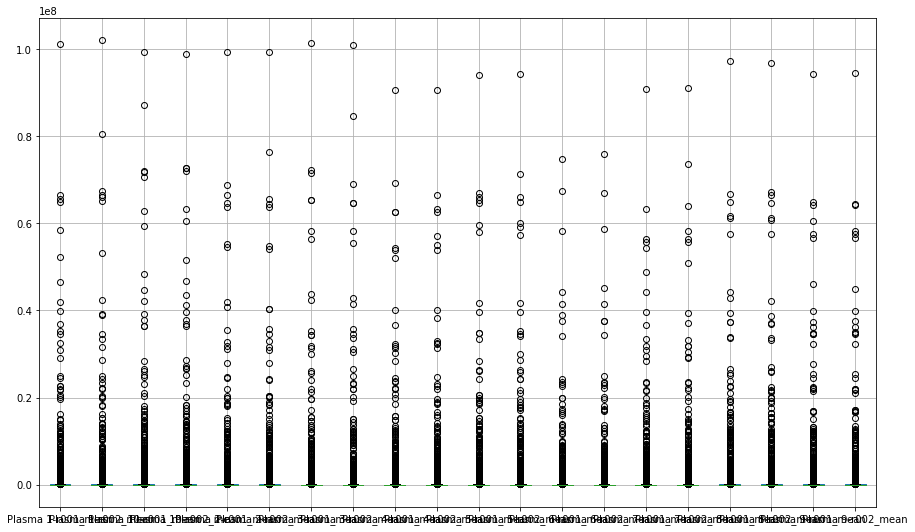

In [6]:
Mices_analysis.boxplot(figsize=(15,9))

<AxesSubplot:>

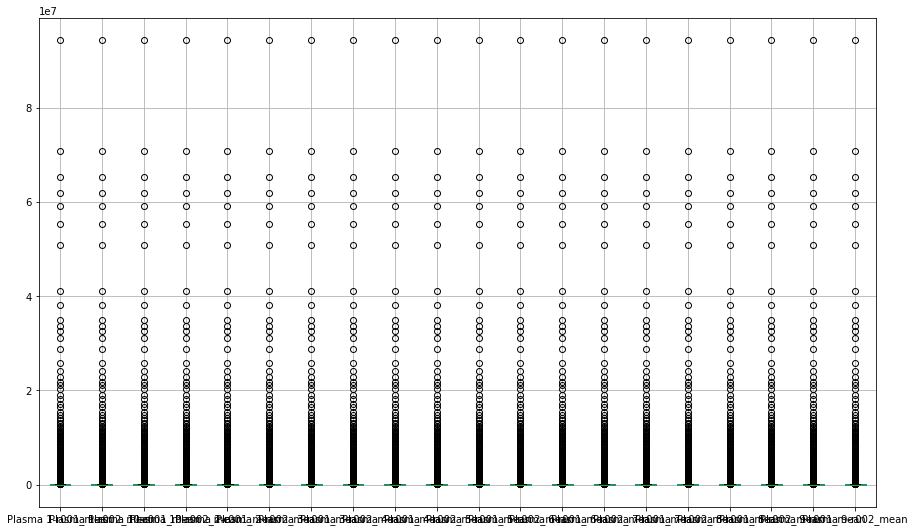

In [7]:
Mices_quantile.boxplot(figsize=(15,9))

In [8]:
MinMaxScaler = MinMaxScaler()
df_new = MinMaxScaler.fit_transform(Mices_quantile.T.values)

In [9]:
pca = PCA(n_components=2,random_state=0)
X_r = pca.fit_transform(df_new)
PCA_analysis_norandom = pd.DataFrame(X_r, columns = ["PC1", "PC2"])
PCA_analysis_norandom

,PC1,PC2
0,-22.027128,6.262057
1,-20.679194,5.212104
2,11.018335,-18.323401
3,11.649637,-19.325196
4,-20.398844,9.632389
5,-19.655985,8.637748
6,-17.142618,-0.579237
7,-16.067958,-2.774816
8,-5.911103,6.070528
9,-4.452393,4.957807


In [10]:
PCA_analysis_norandom["names"] = Mices_quantile.columns
PCA_analysis_norandom["label"] = target.values
PCA_analysis_norandom

,PC1,PC2,names,label
0,-22.027128,6.262057,Plasma 1-r001_mean,True
1,-20.679194,5.212104,Plasma 1-r002_mean,True
2,11.018335,-18.323401,Plasma 10-r001_mean,False
3,11.649637,-19.325196,Plasma 10-r002_mean,False
4,-20.398844,9.632389,Plasma 2-r001_mean,True
5,-19.655985,8.637748,Plasma 2-r002_mean,True
6,-17.142618,-0.579237,Plasma 3-r001_mean,True
7,-16.067958,-2.774816,Plasma 3-r002_mean,True
8,-5.911103,6.070528,Plasma 4-r001_mean,True
9,-4.452393,4.957807,Plasma 4-r002_mean,True


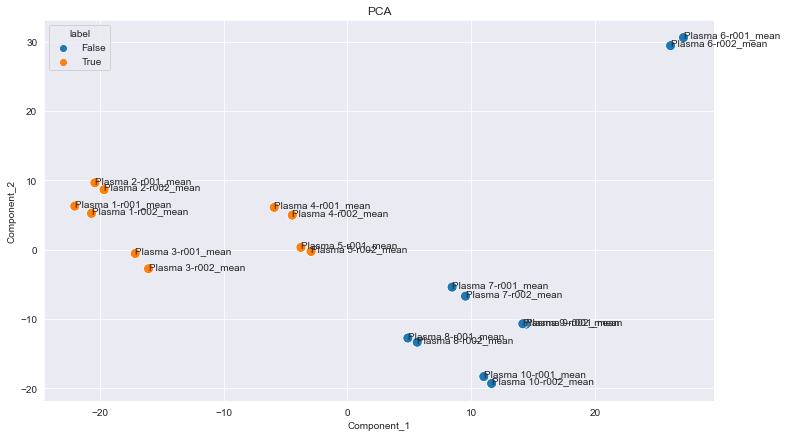

In [11]:
fig = plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
sns.scatterplot(data = PCA_analysis_norandom, x="PC1", y="PC2",hue = "label" , s=100)

plt.title('PCA')
# Set x-axis label
plt.xlabel('Component_1')
# Set y-axis label
plt.ylabel('Component_2')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.01, point['y'], str(point['val']))

label_point(PCA_analysis_norandom.PC1, PCA_analysis_norandom.PC2, PCA_analysis_norandom.names, plt.gca())  
# plt.savefig("images/pca")

<AxesSubplot:>

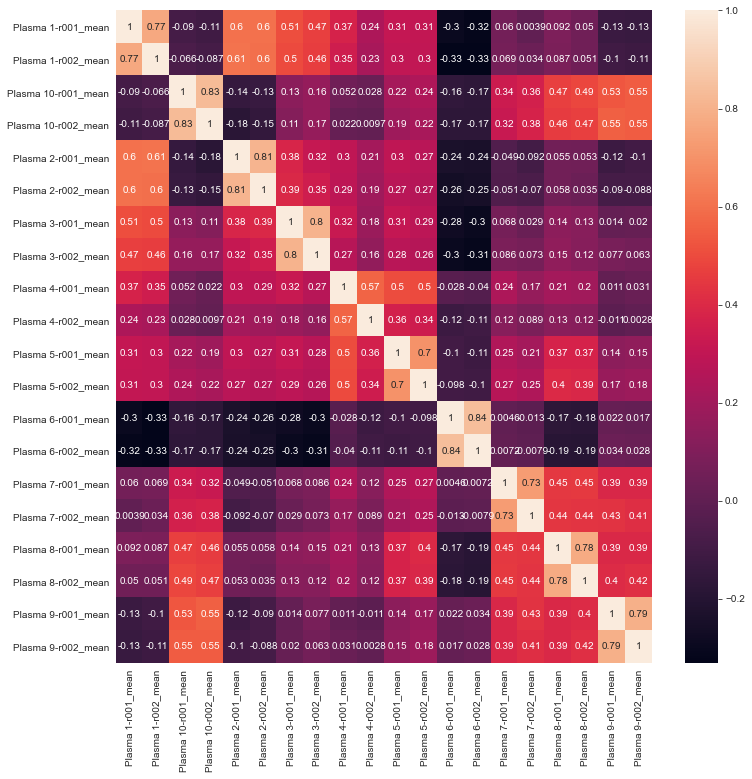

In [12]:
fig = plt.figure(figsize=(12,12))
fig.patch.set_facecolor('xkcd:white')
sns.heatmap(pd.DataFrame(df_new.T, columns = Mices_quantile.columns).corr(), annot=True)

In [13]:
data = pd.DataFrame(df_new.T, columns=Mices_analysis.columns, index = Mices_analysis.index)

In [14]:
data = data[[c for c in data if c not in ['Plasma 10-r001_mean', 'Plasma 10-r002_mean']] 
       + ['Plasma 10-r001_mean', 'Plasma 10-r002_mean']]
data

,Plasma 1-r001_mean,Plasma 1-r002_mean,Plasma 2-r001_mean,Plasma 2-r002_mean,Plasma 3-r001_mean,Plasma 3-r002_mean,Plasma 4-r001_mean,Plasma 4-r002_mean,Plasma 5-r001_mean,Plasma 5-r002_mean,Plasma 6-r001_mean,Plasma 6-r002_mean,Plasma 7-r001_mean,Plasma 7-r002_mean,Plasma 8-r001_mean,Plasma 8-r002_mean,Plasma 9-r001_mean,Plasma 9-r002_mean,Plasma 10-r001_mean,Plasma 10-r002_mean
0,0.818246,0.743150,0.616885,0.502806,0.537283,0.521232,0.580815,0.665997,1.000000,0.740288,0.010367,0.000000,0.416699,0.481812,0.640108,0.486819,0.576712,0.570777,0.648866,0.684973
1,1.000000,0.856352,0.686526,0.711614,0.571328,0.569448,0.037803,0.000000,0.463387,0.463847,0.080225,0.055704,0.258526,0.212763,0.183088,0.167895,0.259131,0.260021,0.340654,0.360967
2,0.575597,0.592636,0.719963,0.561076,0.730678,0.520326,0.676847,0.455462,0.558378,0.455462,1.000000,0.918688,0.544973,0.470070,0.424378,0.457205,0.000000,0.424378,0.485228,0.294342
3,0.879311,0.890958,0.443997,0.249968,0.414335,0.528096,0.644752,0.000000,0.414335,0.486083,0.834957,0.795448,0.849061,1.000000,0.456439,0.376553,0.376553,0.563495,0.112969,0.024600
4,0.906129,1.000000,0.725185,0.468143,0.577865,0.208719,0.563839,0.167194,0.000000,0.043329,0.126503,0.093956,0.961482,0.969225,0.609389,0.518102,0.709003,0.848566,0.355259,0.306104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10737,0.780308,0.835267,0.662469,0.525765,0.757379,0.640129,0.586986,0.543033,0.892254,0.840177,0.000000,0.052467,0.826210,0.682183,0.925281,0.892254,0.747966,0.695279,1.000000,0.861928
10738,0.787166,0.741078,0.761050,0.738265,1.000000,0.894169,0.957194,0.806977,0.676967,0.558590,0.000000,0.396827,0.680705,0.641982,0.616965,0.576539,0.273577,0.286037,0.632397,0.600545
10739,0.837599,0.907305,0.442435,0.268351,0.740590,0.688137,0.723915,0.713603,0.673726,0.832405,0.000000,0.014965,0.797721,0.733120,0.877023,1.000000,0.731649,0.764647,0.896855,0.964235
10740,0.690590,0.579847,0.332358,0.493613,0.704242,0.355891,0.266212,0.263936,0.480839,0.578385,0.157062,0.306355,0.531513,0.000000,0.625353,1.000000,0.739022,0.582610,0.396425,0.574061


In [15]:
startnormal=10
endnormal=20
startcfa=0
endcfa=10
number_col_stat = 20
number_col_pvalue = 21


In [16]:
# TO GET THE RIGHT VALUES FOR STAR AND END OF GROUPS (in the cell before)
#data.iloc[:,startnormal:endnormal]
#data.iloc[:,startcfa:endcfa]
#data.iloc[:,number_col_stat]

In [17]:
from scipy import stats
Data_qnorm_scaled = data
###VOLCANO PLOT
#CALCULATING P-VALUE(STUDENTS)
Data_qnorm_scaled["stat"] = [0]*len(Data_qnorm_scaled)
Data_qnorm_scaled["pvalue"] = [0]*len(Data_qnorm_scaled)
for i in range(len(Data_qnorm_scaled)):
    res = stats.ttest_ind(Data_qnorm_scaled.iloc[i,startnormal:endnormal],Data_qnorm_scaled.iloc[i,startcfa:endcfa], equal_var =False)
    Data_qnorm_scaled.iloc[i,number_col_stat] = res[0]
    Data_qnorm_scaled.iloc[i,number_col_pvalue] = res[1]
Data_qnorm_scaled

<ipython-input-17-6c52d5142c9a>:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = stats.ttest_ind(Data_qnorm_scaled.iloc[i,startnormal:endnormal],Data_qnorm_scaled.iloc[i,startcfa:endcfa], equal_var =False)


,Plasma 1-r001_mean,Plasma 1-r002_mean,Plasma 2-r001_mean,Plasma 2-r002_mean,Plasma 3-r001_mean,Plasma 3-r002_mean,Plasma 4-r001_mean,Plasma 4-r002_mean,Plasma 5-r001_mean,Plasma 5-r002_mean,...,Plasma 7-r001_mean,Plasma 7-r002_mean,Plasma 8-r001_mean,Plasma 8-r002_mean,Plasma 9-r001_mean,Plasma 9-r002_mean,Plasma 10-r001_mean,Plasma 10-r002_mean,stat,pvalue
0,0.818246,0.743150,0.616885,0.502806,0.537283,0.521232,0.580815,0.665997,1.000000,0.740288,...,0.416699,0.481812,0.640108,0.486819,0.576712,0.570777,0.648866,0.684973,-2.372916,3.133436e-02
1,1.000000,0.856352,0.686526,0.711614,0.571328,0.569448,0.037803,0.000000,0.463387,0.463847,...,0.258526,0.212763,0.183088,0.167895,0.259131,0.260021,0.340654,0.360967,-3.003956,1.229693e-02
2,0.575597,0.592636,0.719963,0.561076,0.730678,0.520326,0.676847,0.455462,0.558378,0.455462,...,0.544973,0.470070,0.424378,0.457205,0.000000,0.424378,0.485228,0.294342,-0.866045,4.047880e-01
3,0.879311,0.890958,0.443997,0.249968,0.414335,0.528096,0.644752,0.000000,0.414335,0.486083,...,0.849061,1.000000,0.456439,0.376553,0.376553,0.563495,0.112969,0.024600,0.326941,7.476300e-01
4,0.906129,1.000000,0.725185,0.468143,0.577865,0.208719,0.563839,0.167194,0.000000,0.043329,...,0.961482,0.969225,0.609389,0.518102,0.709003,0.848566,0.355259,0.306104,0.552266,5.876046e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10737,0.780308,0.835267,0.662469,0.525765,0.757379,0.640129,0.586986,0.543033,0.892254,0.840177,...,0.826210,0.682183,0.925281,0.892254,0.747966,0.695279,1.000000,0.861928,-0.318957,7.554922e-01
10738,0.787166,0.741078,0.761050,0.738265,1.000000,0.894169,0.957194,0.806977,0.676967,0.558590,...,0.680705,0.641982,0.616965,0.576539,0.273577,0.286037,0.632397,0.600545,-3.924259,1.424387e-03
10739,0.837599,0.907305,0.442435,0.268351,0.740590,0.688137,0.723915,0.713603,0.673726,0.832405,...,0.797721,0.733120,0.877023,1.000000,0.731649,0.764647,0.896855,0.964235,-0.036669,9.712807e-01
10740,0.690590,0.579847,0.332358,0.493613,0.704242,0.355891,0.266212,0.263936,0.480839,0.578385,...,0.531513,0.000000,0.625353,1.000000,0.739022,0.582610,0.396425,0.574061,0.158342,8.764038e-01


In [18]:
Data_qnorm_scaled["Foldchange"] = Data_qnorm_scaled.iloc[:,startcfa:endcfa].mean(axis=1)/Data_qnorm_scaled.iloc[:,startnormal:endnormal].mean(axis=1)

Data_qnorm_scaled["log2_FC"] = Data_qnorm_scaled.Foldchange.apply(lambda x:np.log2(x))

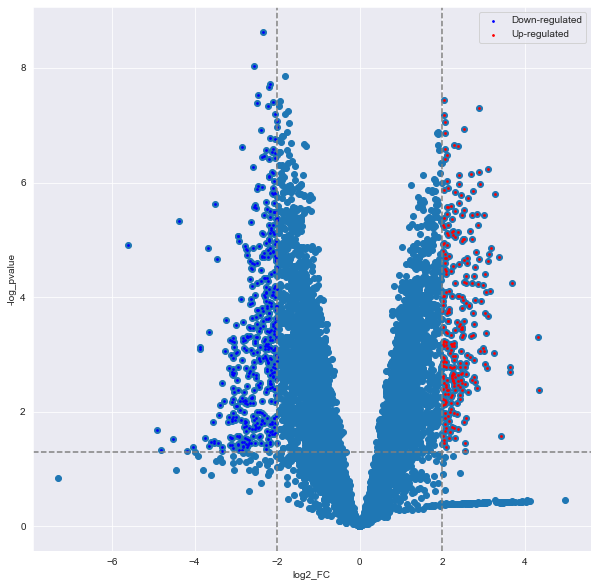

In [19]:

a = Data_qnorm_scaled

fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('xkcd:white')

plt.scatter(x=a['log2_FC'],y=a['pvalue'].apply(lambda x:-np.log10(x)))

# highlight down- or up- regulated genes
down = a[(a['log2_FC']<=-2)&(a['pvalue']<=0.05)].copy()
up = a[(a['log2_FC']>=2)&(a['pvalue']<=0.05)].copy()

plt.scatter(x=down['log2_FC'],y=down['pvalue'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2_FC'],y=up['pvalue'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

# texts=[]
# for i,r in up.iterrows():
#    texts.append(plt.text(x=r['log2_FC'],y=-np.log10(r['pvalue']),s=i))
# #    adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
# for i,r in down.iterrows():
#    texts.append(plt.text(x=r['log2_FC'],y=-np.log10(r['pvalue']),s=i))
# #    adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    

plt.xlabel("log2_FC")
plt.ylabel("-log_pvalue")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(1.3,color="grey",linestyle="--")
plt.legend()

In [20]:
print(f'found {len(up)} upregular biomarkers')
print(f'found {len(down)} downregular biomarkers')

found 273 upregular biomarkers
found 445 downregular biomarkers
